### Imports

In [2]:
# Imports

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

### Reading the Data

In [4]:
# Loading the data

df = pd.read_csv('../Bootcamp Data/school-shootings-data.csv')

### Exploring the Data

In [6]:
# Exploring the df 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               387 non-null    int64  
 1   nces_school_id                    381 non-null    object 
 2   school_name                       387 non-null    object 
 3   nces_district_id                  363 non-null    float64
 4   district_name                     362 non-null    object 
 5   date                              387 non-null    object 
 6   school_year                       387 non-null    object 
 7   year                              387 non-null    int64  
 8   time                              363 non-null    object 
 9   day_of_week                       387 non-null    object 
 10  city                              387 non-null    object 
 11  state                             387 non-null    object 
 12  school_t

In [7]:
# Exploring the df 

df.describe()

,uid,nces_district_id,year,killed,injured,casualties,age_shooter1,shooter_deceased1,age_shooter2,shooter_deceased2,...,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,lat,long,staffing,state_fips,county_fips,ulocale
count,387.000000,3.630000e+02,387.000000,387.000000,387.000000,387.000000,274.000000,262.000000,12.000000,6.000000,...,376.000000,262.000000,262.000000,387.000000,386.000000,386.000000,363.000000,387.000000,387.000000,384.000000
mean,194.542636,2.683346e+06,2014.204134,0.519380,1.108527,1.622739,19.284672,0.152672,16.916667,0.166667,...,8.436170,5.015267,31.683206,0.271318,37.070614,-92.176124,61.546846,26.679587,26776.191214,19.947917
std,112.678322,1.638245e+06,7.452592,2.171772,2.215958,3.847791,9.748823,0.360359,1.505042,0.408248,...,25.989355,23.552659,37.592018,0.445215,5.121773,15.553162,38.739547,16.130641,16166.320448,10.668633
min,1.000000,1.000080e+05,1999.000000,0.000000,0.000000,0.000000,6.000000,0.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,21.310400,-157.837200,3.000000,1.000000,1009.000000,11.000000
25%,97.500000,1.200480e+06,2008.000000,0.000000,0.000000,0.000000,15.000000,0.000000,15.750000,0.000000,...,0.000000,0.000000,4.250000,0.000000,33.686293,-97.506534,31.210000,12.000000,12061.000000,11.000000
50%,194.000000,2.614280e+06,2017.000000,0.000000,1.000000,1.000000,16.000000,0.000000,17.000000,0.000000,...,2.000000,1.000000,17.000000,0.000000,37.044535,-87.582092,55.300000,26.000000,26125.000000,13.000000
75%,290.500000,4.155394e+06,2021.000000,0.000000,1.000000,1.000000,19.000000,0.000000,18.000000,0.000000,...,6.000000,2.000000,46.750000,1.000000,40.647249,-80.818711,86.050000,41.000000,41045.000000,22.000000
max,391.000000,5.516470e+06,2023.000000,26.000000,21.000000,34.000000,72.000000,1.000000,20.000000,1.000000,...,331.000000,338.000000,199.000000,1.000000,61.213281,-70.952603,203.320000,55.000000,55139.000000,43.000000


In [8]:
# Exploring the df 

df.head(5)

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.6,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.0,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.0,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.0,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543,Suffolk County,25,25025,11.0


In [9]:
# Exploring the df 

df.tail(5)

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
382,386,421899007517,E. Washington Rhodes Elementary School,4218990.0,Philadelphia City Sd,5/8/2023,2022-2023,2023,11:30 AM,Monday,...,40.002800,-75.178100,41.37,KG,8,403,Philadelphia County,42,42101,11.0
383,387,110003000008,Roosevelt High School,1100030.0,District Of Columbia Public Schools,5/17/2023,2022-2023,2023,2:25 PM,Wednesday,...,38.942971,-77.029177,67.90,9,12,392,District Of Columbia,11,11001,11.0
384,390,00600937,St. John's Prep,NaN,NaN,5/22/2023,2022-2023,2023,NaN,Monday,...,42.582682,-70.952603,176.30,6,12,NaN,Essex County,25,25009,21.0
385,389,421917006047,Oliver Citywide Academy,4219170.0,Pittsburgh Sd,5/24/2023,2022-2023,2023,7:30 AM,Wednesday,...,40.464327,-80.024121,22.63,3,12,88,Allegheny County,42,42003,11.0
386,391,260021001494,Michigan Collegiate High School,2600210.0,Conner Creek Academy East,6/5/2023,2022-2023,2023,2:40 PM,Monday,...,42.522585,-83.066681,24.84,6,12,595,Macomb County,26,26099,12.0


In [10]:
# Exploring the df 

df.sample(10)

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
6,7,401197000559,Fort Gibson Middle School,4011970.0,Fort Gibson,12/6/1999,1999-2000,1999,7:45 AM,Monday,...,35.795556,-95.241921,25.40,6,8,146,Muskogee County,40,40101,32.0
81,81,481970008026,South Hills High School,4819700.0,Fort Worth ISD,9/8/2006,2006-2007,2006,1:20 PM,Friday,...,32.657260,-97.360000,86.70,9,12,921,Tarrant County,48,48439,11.0
84,84,NaN,West Nickel Mines Amish School,NaN,NaN,10/2/2006,2006-2007,2006,11:07 AM,Monday,...,39.960081,-76.084367,NaN,NaN,NaN,NaN,Lancaster County,42,42071,NaN
335,338,262540000932,Aspen Ridge Elementary School,2625400.0,Nice Community School District,4/26/2022,2021-2022,2022,1:30 PM,Tuesday,...,46.480500,-87.728900,50.95,KG,8,264,Marquette County,26,26103,41.0
238,232,350001001024,V. Sue Cleveland High School,3500010.0,Rio Rancho Public Schools,2/14/2019,2018-2019,2019,7:15 AM,Thursday,...,35.312773,-106.641929,123.06,9,12,750,Sandoval County,35,35043,41.0
250,242,062271003087,Hollenbeck Middle School,622710.0,Los Angeles Unified,8/27/2019,2019-2020,2019,11:00 AM,Tuesday,...,34.036765,-118.212583,47.83,6,8,982,Los Angeles County,6,6037,11.0
252,240,110003000122,Aiton Elementary School,1100030.0,District Of Columbia Public Schools,9/25/2019,2019-2020,2019,NaN,Wednesday,...,38.896669,-76.933728,21.00,PK,5,NaN,District of Columbia,11,11001,11.0
181,181,010039000141,Huffman High School,100390.0,Birmingham City,3/15/2016,2015-2016,2016,2:30 PM,Tuesday,...,33.612910,-86.682000,66.00,9,12,775,Jefferson County,1,1073,12.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543,Suffolk County,25,25025,11.0
264,256,490087000524,West High School,4900870.0,Salt Lake District,2/13/2020,2019-2020,2020,3:00 PM,Thursday,...,40.774742,-111.900444,111.84,7,12,1483,Salt Lake County,49,49035,12.0


### Preparing the Data

In [12]:
# Finding nulls

df.isnull().sum()

uid                                   0
nces_school_id                        6
school_name                           0
nces_district_id                     24
district_name                        25
date                                  0
school_year                           0
year                                  0
time                                 24
day_of_week                           0
city                                  0
state                                 0
school_type                           0
enrollment                            0
killed                                0
injured                               0
casualties                            0
shooting_type                         0
age_shooter1                        113
gender_shooter1                      78
race_ethnicity_shooter1             239
shooter_relationship1               121
shooter_deceased1                   125
deceased_notes1                     349
age_shooter2                        375


In [13]:
# Replacing infinite values with NaN

df = df.replace([np.inf, -np.inf], np.nan)

In [14]:
# Checking data types

df.dtypes

# Changing data types to numeric

df['hispanic'] = pd.to_numeric(df.hispanic, errors='coerce')
df.dtypes

df['enrollment'] = pd.to_numeric(df.enrollment, errors='coerce')

# Changing data types to string

df['resource_officer'] = df['resource_officer'].map({1: 'Present', 0: 'Not Present'})

In [15]:
# Dropping columns with large null values

df = df.drop('race_ethnicity_shooter1', axis=1)
df = df.drop('deceased_notes1', axis=1)
df = df.drop('race_ethnicity_shooter2', axis=1)
df = df.drop('deceased_notes2', axis=1)
df = df.drop('two_or_more', axis=1)
df = df.drop('weapon_source', axis=1)
df = df.drop('hawaiian_native_pacific_islander', axis=1)
df = df.drop('weapon', axis=1)
df = df.drop('shooter_deceased1', axis=1)
df = df.drop('shooter_relationship1', axis=1)
df = df.drop('shooter_deceased2', axis=1)
df = df.drop('shooter_relationship2', axis=1)
df = df.drop('age_shooter2', axis=1)
df = df.drop('gender_shooter2', axis=1)
df = df.drop('gender_shooter1', axis=1)

# Dropping unneeded columns 

df = df.drop('nces_school_id', axis=1)
df = df.drop('nces_district_id', axis=1)
df = df.drop('lat', axis=1)
df = df.drop('long', axis=1)
df = df.drop('lunch', axis=1)
df = df.drop('ulocale', axis=1)
df = df.drop('district_name', axis=1)
df = df.drop('time', axis=1)

In [16]:
# Filling nulls

# Age of shooter 1

df['age_shooter1'] = df['age_shooter1'].fillna(value=19)

# Enrollment of Asian students

mean_asian = df['asian'].mean()
df['asian'] = df['asian'].fillna(value=mean_asian)

# Enrollment of Black students

mean_black = df['black'].mean()
df['black'] = df['black'].fillna(value=mean_black)

# Enrollment of Hispanic students

mean_hispanic = df['hispanic'].mean()
df['hispanic'] = df['hispanic'].fillna(value=mean_hispanic)

# Enrollment of White students

mean_white = df['white'].mean()
df['white'] = df['white'].fillna(value=mean_white)

# Enrollment of American Indian and Alaskan native students

mean_native = df['american_indian_alaska_native'].mean()
df['american_indian_alaska_native'] = df['american_indian_alaska_native'].fillna(value=mean_native)

# Enrollment 

mean_enroll = df['enrollment'].mean()
df['enrollment'] = df['enrollment'].fillna(value=mean_enroll)

# Staffing

mean_staff = df['staffing'].mean()
df['staffing'] = df['staffing'].fillna(value=mean_staff)


In [17]:
# Filling nulls with modes 

# Lowest grade at schools

df['low_grade'] = df['low_grade'].fillna(value=9)

# Highest grade at schools

df['high_grade'] = df['high_grade'].fillna(value=12)

In [18]:
# Filling missing values 

# County values

df[df['county'].isnull()].index.tolist()

df.at[247, 'county'] = 'Lake County'

df.at[273, 'county'] = 'New Haven'

In [19]:
df.isnull().sum()

uid                              0
school_name                      0
date                             0
school_year                      0
year                             0
day_of_week                      0
city                             0
state                            0
school_type                      0
enrollment                       0
killed                           0
injured                          0
casualties                       0
shooting_type                    0
age_shooter1                     0
white                            0
black                            0
hispanic                         0
asian                            0
american_indian_alaska_native    0
resource_officer                 0
staffing                         0
low_grade                        0
high_grade                       0
county                           0
state_fips                       0
county_fips                      0
dtype: int64

### Analyzing the Data and Visualizations

In [21]:
# School shootings by Year

grp_year = df.groupby(['year'])['uid'].nunique().reset_index(name='count') 

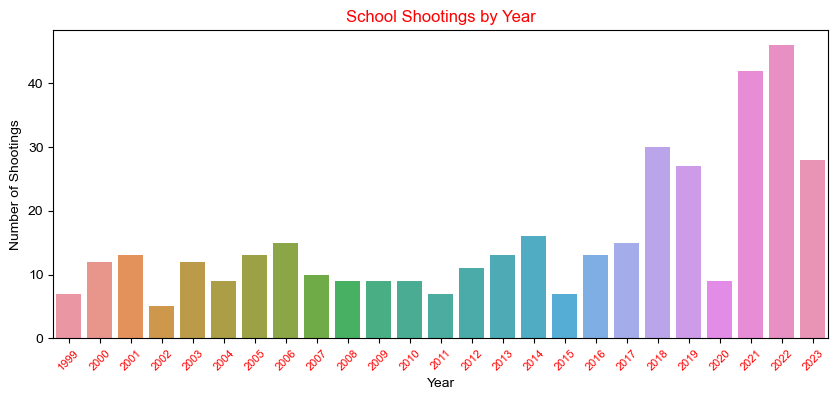

In [22]:
# Visualization 

# Plotting the data

fig, ax = plt.subplots(figsize=(10,4))
ax = sns.barplot(data=grp_year, x='year', y='count')

# Adding customizations

sns.set_style('darkgrid')
plt.title('School Shootings by Year', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45, size=8, color='red')

plt.show()

In [23]:
# Average Casualties by Year

grp_cas = df.groupby(['year', 'uid'])['casualties'].sum().reset_index(name='count')

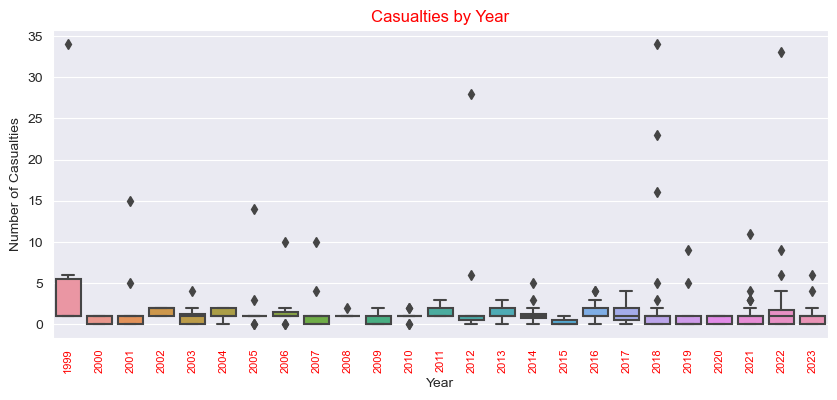

In [24]:
# Visualization

# Plotting the data

ax, fig = plt.subplots(figsize=(10,4))
ax = sns.boxplot(data=grp_cas, x='year', y='count')

# Adding customizations

plt.title('Casualties by Year', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=90, size=8, color='red')

plt.show()

In [25]:
# School shootings by Day

grp_day = df.groupby('day_of_week')['uid'].nunique().reset_index(name='count').sort_values(by='count', ascending=False)

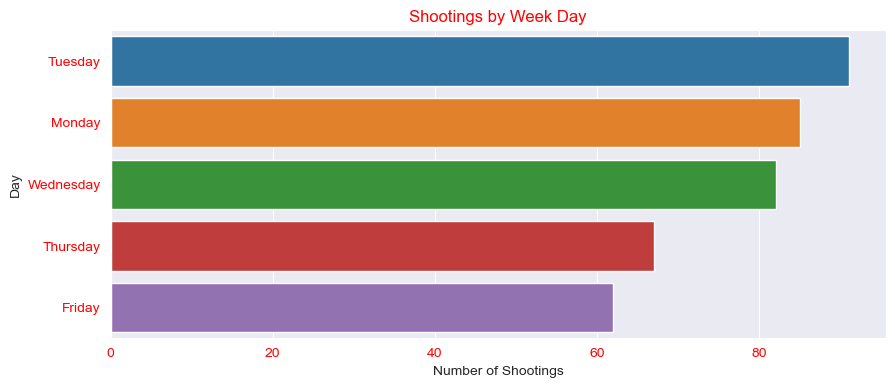

In [26]:
# Visualization

# Plotting the data

ax, fig = plt.subplots(figsize=(10,4))
ax = sns.barplot(data=grp_day, x='count', y='day_of_week')

# Adding customizations

plt.title('Shootings by Week Day', color='red')
plt.xlabel('Number of Shootings')
plt.ylabel('Day')
plt.xticks(color='red')
plt.yticks(color='red')

plt.show()

In [27]:
# Shootings by Enrolled Student Racial Profiles

grp_race = df.groupby(['year', 'white', 'black', 'hispanic', 'asian', 'american_indian_alaska_native'])['uid'].nunique().reset_index()

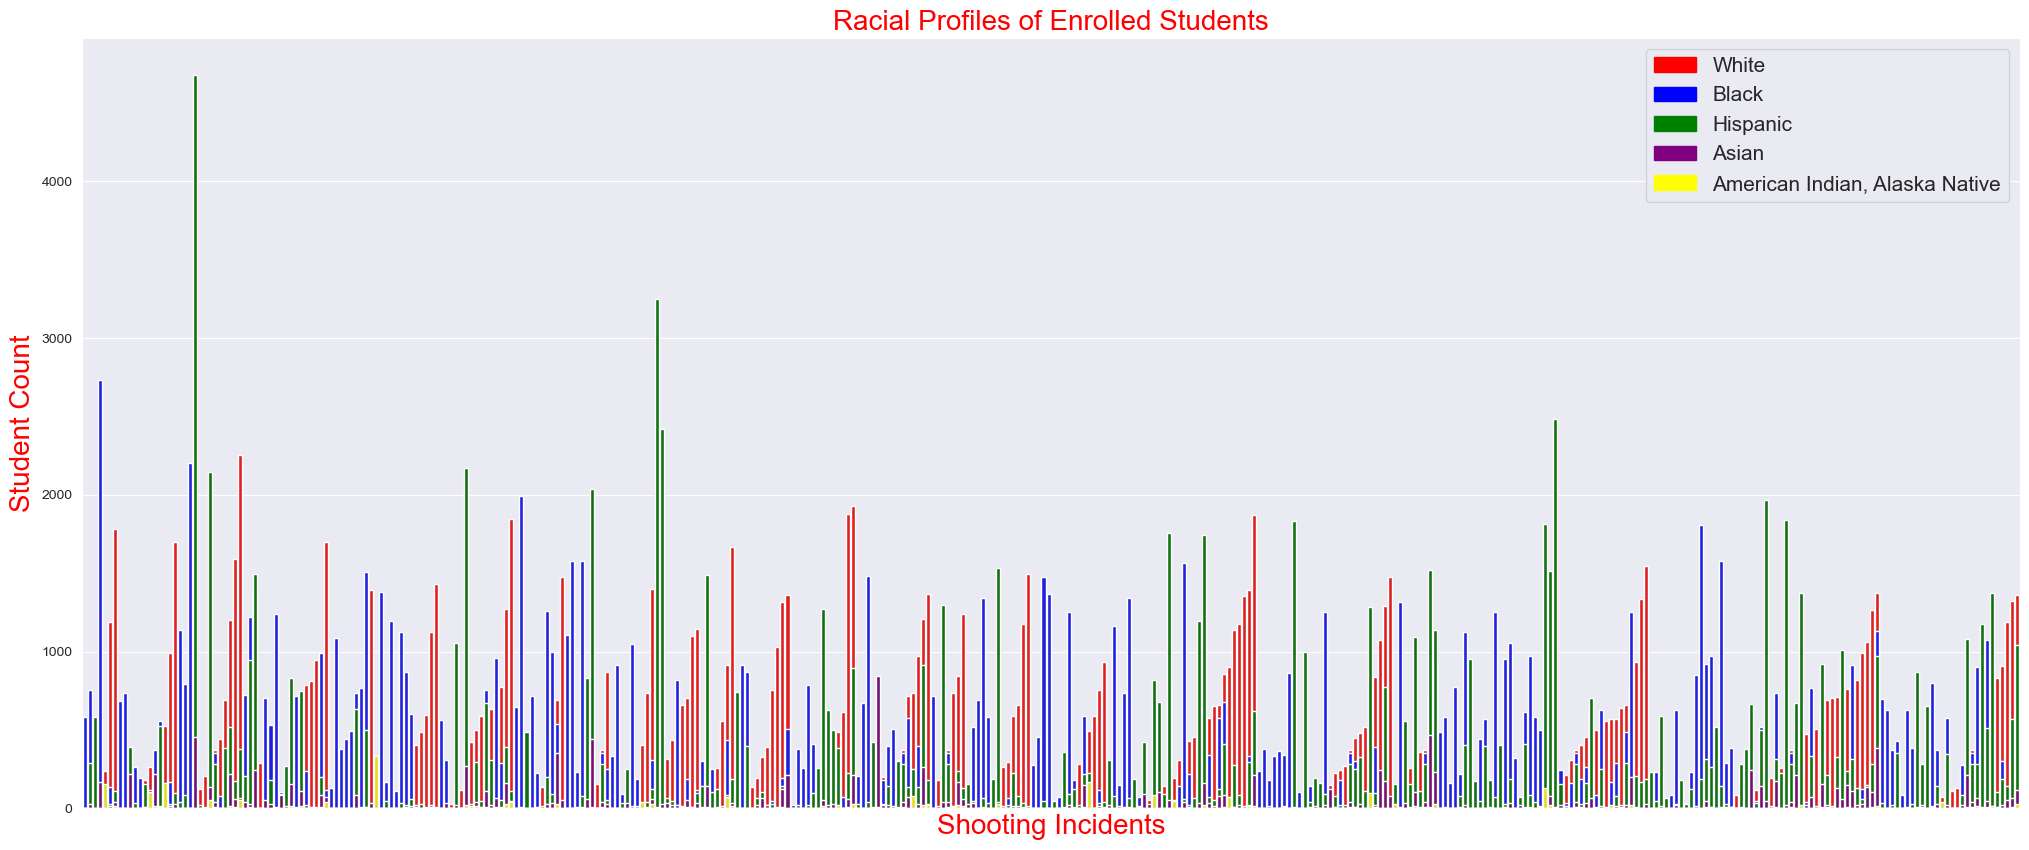

In [28]:
# Visualization

# Plotting the data 

plt.figure(figsize=(25, 10))

wb = sns.barplot(data=grp_race, x=grp_race.index, y='white', color='red')
bb = sns.barplot(data=grp_race, x=grp_race.index, y='black', color='blue')
hb = sns.barplot(data=grp_race, x=grp_race.index, y='hispanic', color='green')
ab = sns.barplot(data=grp_race, x=grp_race.index, y='asian', color='purple')
aib = sns.barplot(data=grp_race, x=grp_race.index, y='american_indian_alaska_native', color='yellow')

# Adding customizations

plt.title('Racial Profiles of Enrolled Students', color='red', size=20)
plt.xlabel('Shooting Incidents', size=20, color='red')
plt.xticks(None)
plt.ylabel('Student Count', size=20, color='red')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Adding a legend

wl = mpatches.Patch(color='red', label='White')
bl = mpatches.Patch(color='blue', label='Black')
hl = mpatches.Patch(color='green', label='Hispanic')
al = mpatches.Patch(color='purple', label='Asian')
ail = mpatches.Patch(color='yellow', label='American Indian, Alaska Native')
plt.legend(handles=[wl, bl, hl, al, ail], fontsize=15)

plt.show()

In [29]:
# Shootings by Age

grp_ag = df.groupby(['age_shooter1'])['uid'].count().reset_index(name='count')

/Users/claireoates-calver/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


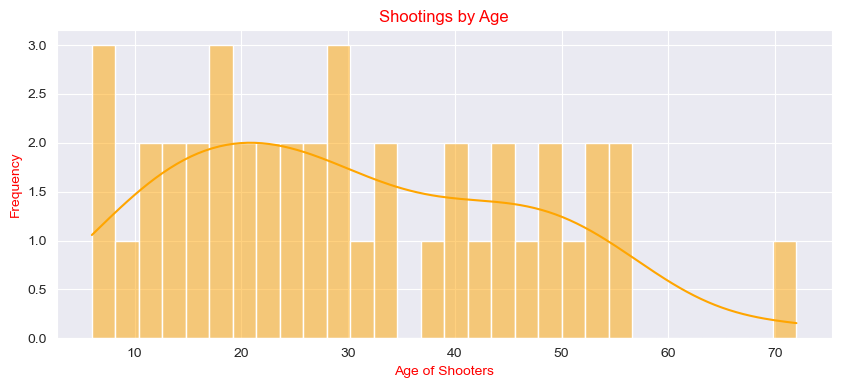

In [30]:
# Visualization

# Plotting the data

ax, fig = plt.subplots(figsize=(10,4))
ax = sns.histplot(data=grp_ag, x='age_shooter1', bins=30, color='orange', kde=True)

# Adding customizations

plt.title('Shootings by Age', color='red')
plt.xlabel('Age of Shooters', color='red')
plt.ylabel('Frequency', color='red')

plt.show()

In [31]:
# School Shootings by Year, Killed, and Injured

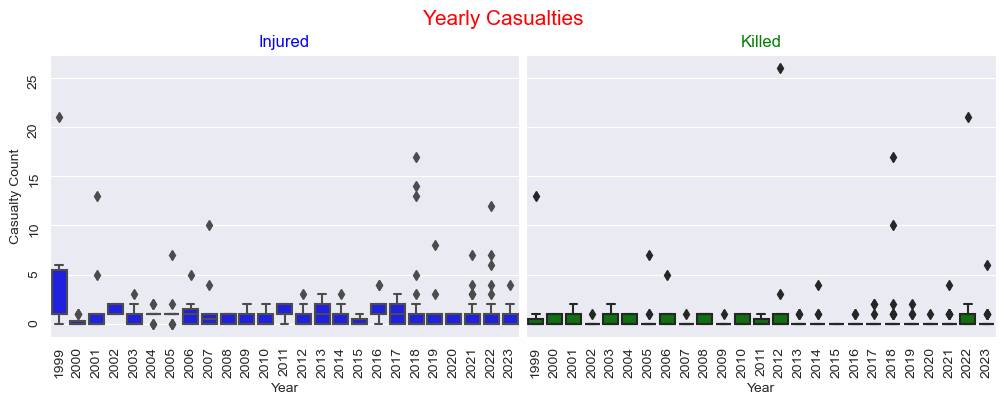

In [76]:
# Visualization

# Plotting the data 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True)

ax1 = sns.boxplot(data=df, x='year', y='injured', ax=ax1, color='blue')
ax2 = sns.boxplot(data=df, x='year', y='killed', ax=ax2, color='green')

# Adding customizations

fig.suptitle('Yearly Casualties', color='red', size=15)
ax1.set_title('Injured', color='blue')
ax2.set_title('Killed', color='green')
ax1.set_ylabel('Casualty Count')
ax2.set_ylabel(None)
ax1.set_xlabel('Year')
ax2.set_xlabel('Year')
ax1.tick_params(rotation=90)
ax2.tick_params(rotation=90)
fig.tight_layout(pad=.5)

plt.show()

In [33]:
# School shootings by Year and Resource Officer Prescence

grp_off = df.groupby(['year', 'resource_officer'])['uid'].nunique().reset_index(name='count')

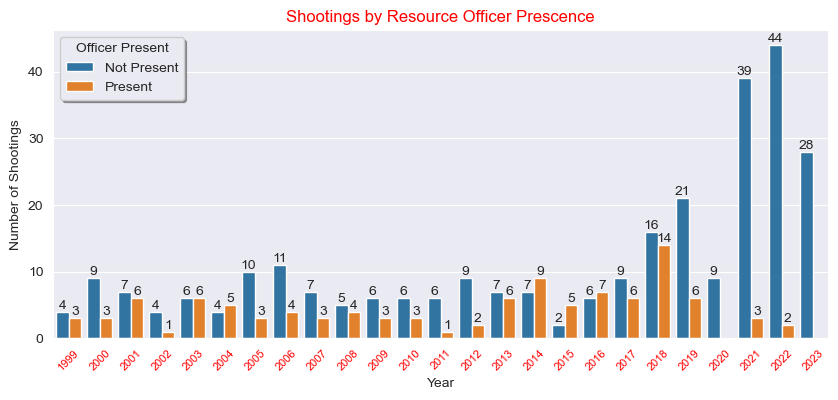

In [34]:
# Visualization

# Plotting the data

ax, fig = plt.subplots(figsize=(10,4))
ax = sns.barplot(data=grp_off, x='year', y='count', hue='resource_officer')

# Customizations 

plt.title('Shootings by Resource Officer Prescence', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45, size=8, color='red')
ax.legend(title='Officer Present', shadow=True)

# Setting bar labels 

for con in ax.containers:
    ax.bar_label(con)

plt.show()

In [35]:
# School shootings by State

grp_plc = df.groupby(['state'])['uid'].nunique().reset_index(name='count').sort_values(by='count', ascending=False)

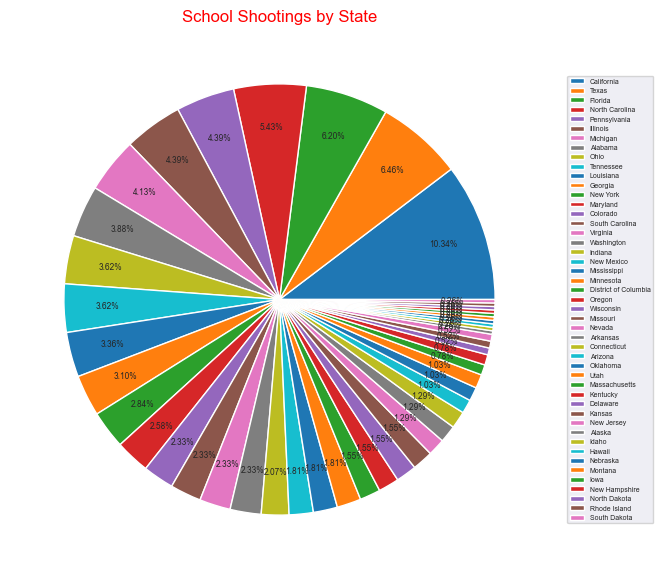

In [36]:
# Visualization

# Plotting the data

fig, ax = plt.subplots(figsize=(10,7))
ax.pie(x=grp_plc['count'], labels=None, rotatelabels=True, textprops={'fontsize': 6}, autopct='%1.02f%%', pctdistance=.8)

# Customizations

ax.legend(loc='right', bbox_to_anchor=(1.2, .5), fontsize=5, labels=grp_plc.state)
plt.title('School Shootings by State', loc='center', color='red')

plt.show()